# perceptron

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron # Algo
from mlxtend.plotting import plot_decision_regions # Algo working Visualization

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1
...,...,...,...
95,6.33,6.38,0
96,8.23,7.76,1
97,6.65,7.78,0
98,8.14,5.63,1


## Visualizing data

<AxesSubplot: xlabel='cgpa', ylabel='resume_score'>

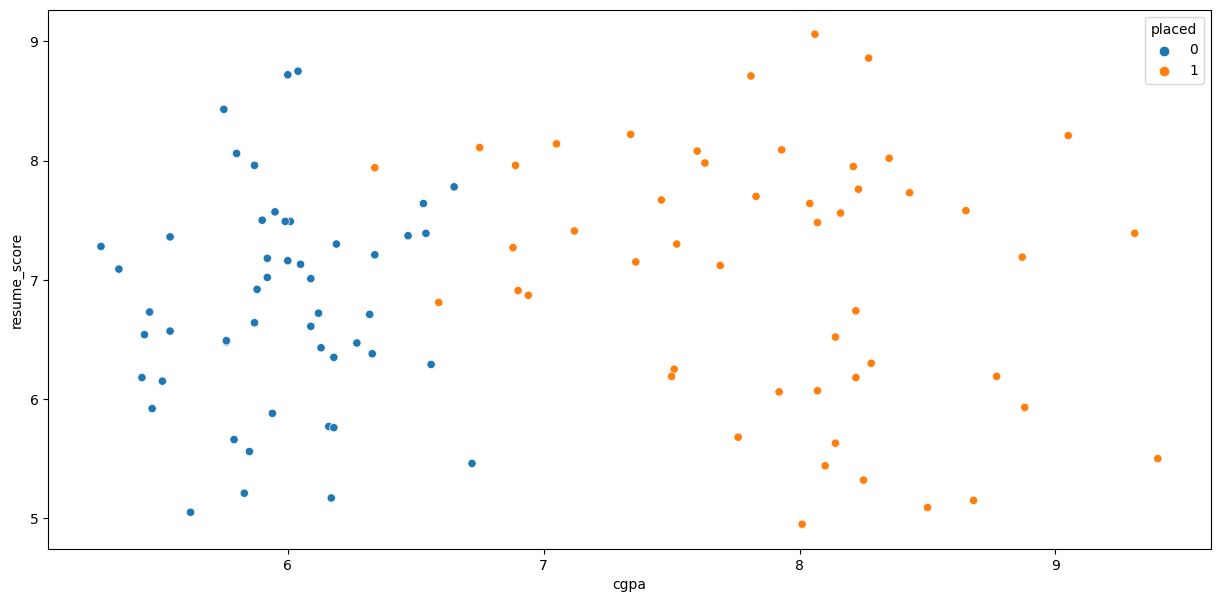

In [4]:
plt.figure(figsize=(15,7))
sns.scatterplot(data =df, x=df['cgpa'],y=df['resume_score'],hue=df['placed'])


<AxesSubplot: xlabel='resume_score', ylabel='cgpa'>

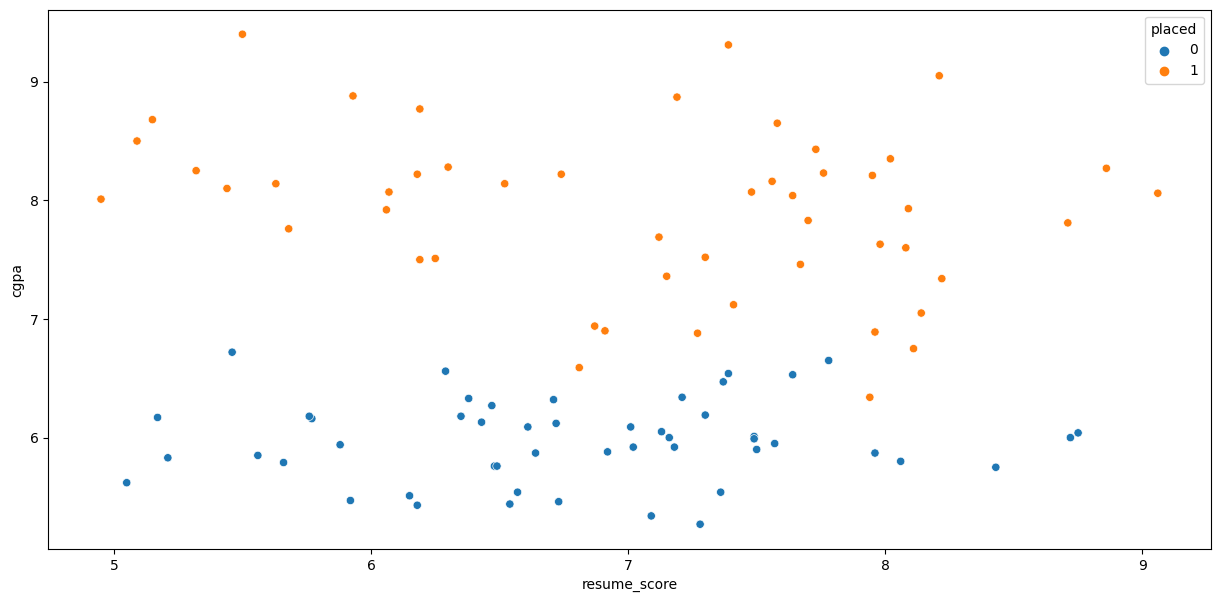

In [5]:
plt.figure(figsize=(15,7))
sns.scatterplot(data =df, y=df['cgpa'],x=df['resume_score'],hue=df['placed'])


In [10]:
## independent and dependent features
X = df.iloc[:,:2]
y = df.iloc[:,-1]

In [11]:
y

0     1
1     0
2     1
3     1
4     1
     ..
95    0
96    1
97    0
98    1
99    0
Name: placed, Length: 100, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((67, 2), (67,), (33, 2), (33,))

In [16]:
precept = Perceptron()
precept.fit(X_train,y_train)

Perceptron()

In [34]:
coef = precept.coef_[0]
coef

array([ 44.76, -48.82])

## Visualizing Perceptron Coefficients

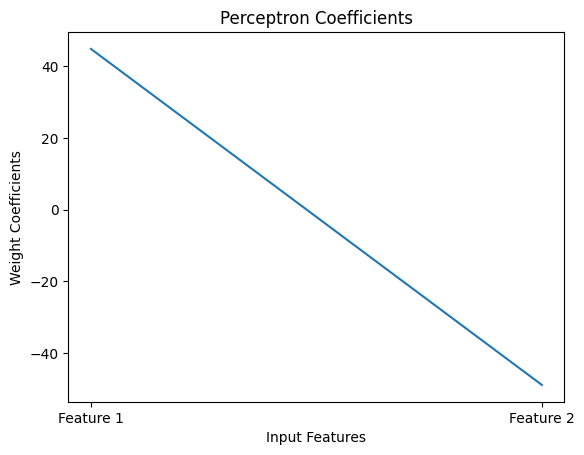

In [37]:

fig, ax = plt.subplots()
ax.plot(range(len(coef)), coef)

ax.set_xticks(range(len(coef)))
ax.set_xticklabels(['Feature {}'.format(i+1) for i in range(len(coef))])
ax.set_xlabel('Input Features')
ax.set_ylabel('Weight Coefficients')
ax.set_title('Perceptron Coefficients')
plt.show()

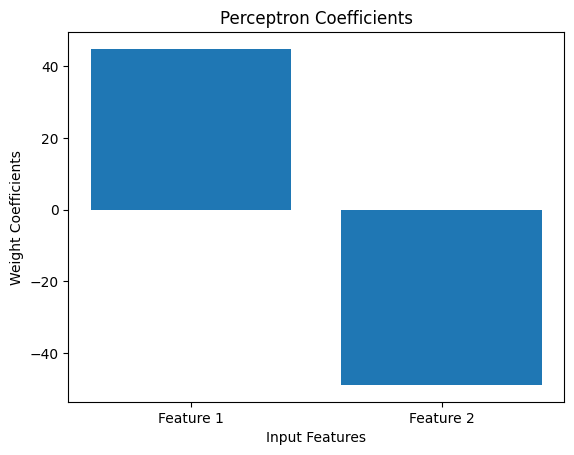

In [43]:

fig, ax = plt.subplots()
ax.bar(range(len(coef)), coef)
ax.set_xticks(range(len(coef)))
ax.set_xticklabels(['Feature {}'.format(i+1) for i in range(len(coef))])
ax.set_xlabel('Input Features')
ax.set_ylabel('Weight Coefficients')
ax.set_title('Perceptron Coefficients')
plt.show()

## Visualizing Perceptron workings

c:\Users\Gyanprakash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<AxesSubplot: >

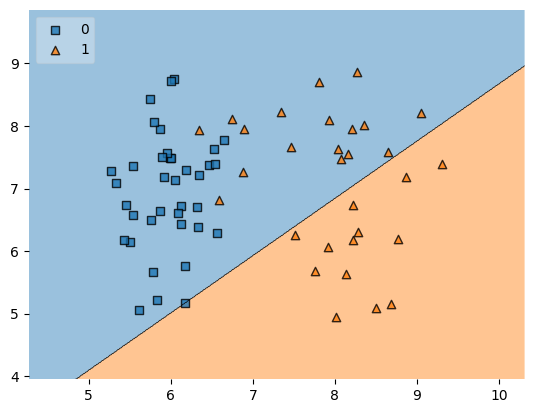

In [48]:
plot_decision_regions(X=X_train.values,y=y_train.values,clf=precept,legend=2)

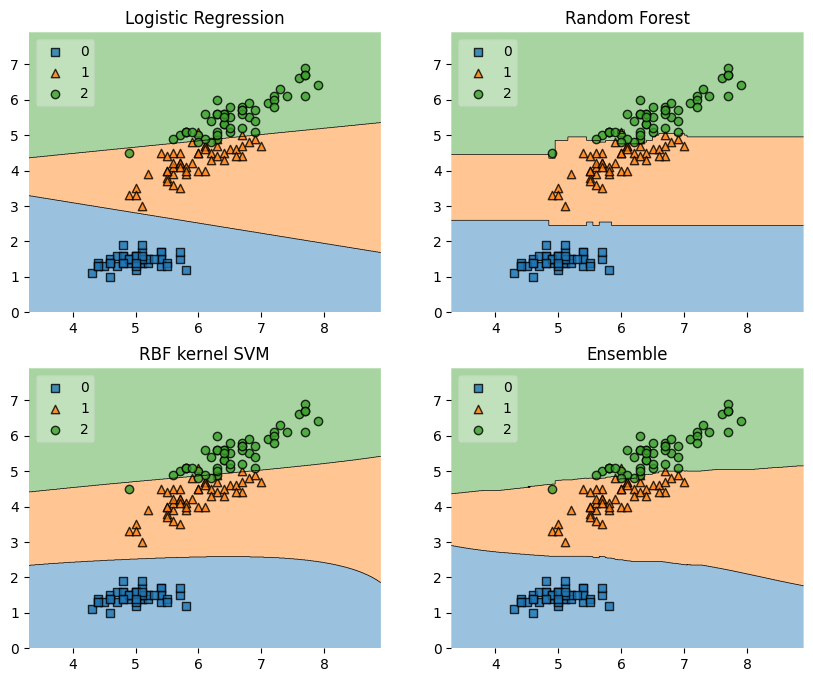

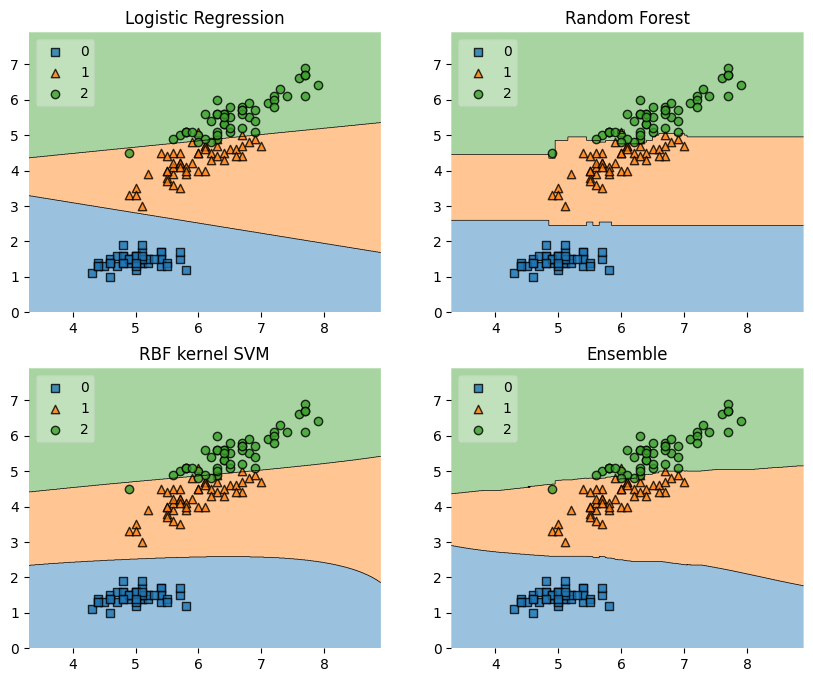

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3],
                              weights=[2, 1, 1], voting='soft')

# Loading some example data
X, y = iris_data()
X = X[:,[0, 2]]

# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression',
          'Random Forest',
          'RBF kernel SVM',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()
